In [28]:
!pip install pip install scikit-uplift

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import lightgbm as lgb  
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
path = '/content/drive/MyDrive/Uplift/train.csv'
train = pd.read_csv(path)
train

,client_id,treatment_flg,purchased
0,ad6561e2d8,1,1
1,7c1ccbf93f,1,1
2,b58fadcab6,1,1
3,e99e6fabb9,0,0
4,27fb6f8520,1,1
...,...,...,...
140022,999d284453,1,1
140023,f634deea4e,0,1
140024,16cb4f99b0,0,1
140025,23c2b72b2e,1,1


In [31]:
path_two = '/content/drive/MyDrive/Uplift/clients2.csv.zip'
clients = pd.read_csv(path_two)
clients

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,00010925a5,NaN,2018-07-24 16:21:29,2018-09-14 16:12:49,83,U
3,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F
4,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73,U
...,...,...,...,...,...,...
200034,fffe0abb97,NaN,2017-11-27 08:56:54,2018-02-11 09:26:08,35,F
200035,fffe0ed719,NaN,2017-09-15 08:53:24,2017-12-12 14:50:12,69,U
200036,fffea1204c,NaN,2018-01-31 16:59:37,2018-03-12 17:02:27,73,F
200037,fffeca6d22,NaN,2017-12-28 11:56:13,NaN,77,F


In [32]:
path_purch = '/content/drive/MyDrive/Uplift/train_purch.csv.zip'
train_purch = pd.read_csv(path_purch)
train_purch

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998947,fffeca6d22,a0bb11a968,2019-03-09 07:47:43,0.4,0.0,0.0,0.0,99.0,a0613e36b5,de437430e2,1.0,19.0,NaN
15998948,fffeca6d22,a0bb11a968,2019-03-09 07:47:43,0.4,0.0,0.0,0.0,99.0,a0613e36b5,ad8fee4200,1.0,45.0,NaN
15998949,fffeca6d22,3b876a5532,2019-03-15 14:46:39,0.8,0.0,0.0,0.0,165.0,a0613e36b5,ad8fee4200,2.0,94.0,NaN
15998950,fffeca6d22,3b876a5532,2019-03-15 14:46:39,0.8,0.0,0.0,0.0,165.0,a0613e36b5,230dbb0c16,1.0,50.0,NaN


In [33]:
clients = clients.set_index("client_id")
train = train.set_index("client_id")
train_purch = train_purch.set_index("client_id")
indices_test = pd.Index(set(clients.index) - set(train.index))

In [34]:
df_features = clients.copy()

df_features['first_issue_time'] = (pd.to_datetime(df_features['first_issue_date']) - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['first_redeem_time'] = (pd.to_datetime(df_features['first_redeem_date']) - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['issue_redeem_delay'] = df_features['first_redeem_time'] - df_features['first_issue_time']
df_features = df_features.drop(['first_issue_date', 'first_redeem_date'], axis=1)

df_features


,client_id.1,age,gender,first_issue_time,first_redeem_time,issue_redeem_delay
client_id,,,,,,
000012768d,NaN,45,U,1501947648,1.515094e+09,13146559.0
000036f903,NaN,72,F,1491832463,1.492951e+09,1118613.0
00010925a5,NaN,83,U,1532449289,1.536942e+09,4492280.0
0001f552b0,NaN,33,F,1498850438,1.535461e+09,36610747.0
00020e7b18,NaN,73,U,1511782905,1.515607e+09,3823700.0
...,...,...,...,...,...,...
fffe0abb97,NaN,35,F,1511773014,1.518341e+09,6568154.0
fffe0ed719,NaN,69,U,1505465604,1.513090e+09,7624608.0
fffea1204c,NaN,73,F,1517417977,1.520874e+09,3456170.0


In [35]:
indices_learn, indices_valid = train_test_split(train.index, test_size=0.3, random_state=123)

In [36]:
X_train = df_features.loc[indices_learn, :]
y_train = train.loc[indices_learn, 'purchased']
treat_train = train.loc[indices_learn, 'treatment_flg']

X_val = df_features.loc[indices_valid, :]
y_val = train.loc[indices_valid, 'purchased']
treat_val =  train.loc[indices_valid, 'treatment_flg']

X_train_full = df_features.loc[train.index, :]
y_train_full = train.loc[:, 'purchased']
treat_train_full = train.loc[:, 'treatment_flg']

X_test = df_features.loc[indices_test, :]

cat_features = ['gender']

models_results = { 'approach' : [] ,
                    'uplift@30%' : []   
}

In [37]:
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
sm = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})
v
uplift_sm = sm.predict(X_val)

sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)

print(models_results)

{'approach': ['SoloModel'], 'uplift@30%': [0.06267850543672093]}


Uplift@k - метрика. Топ k (в нашем случае 30%) выборки, отсортированной по предсказанному моделью uplift score

In [39]:
# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

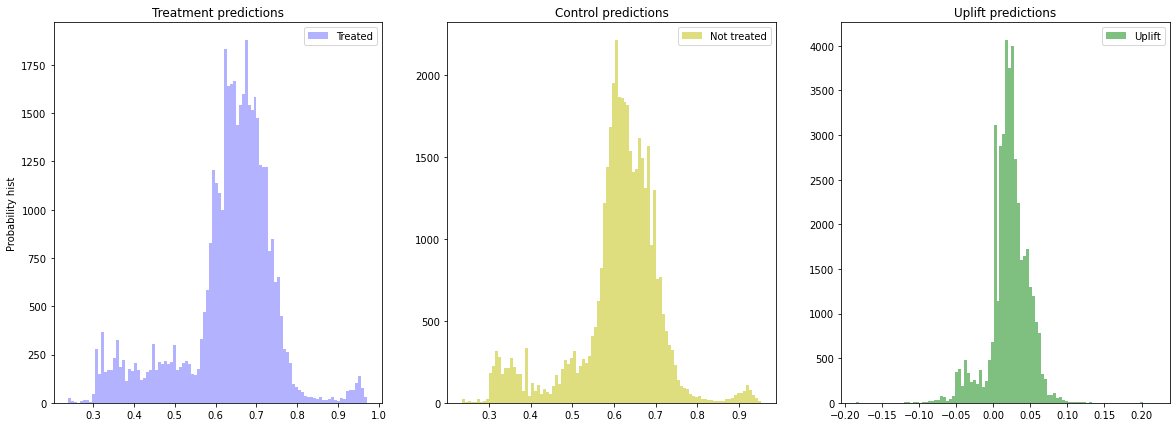

In [40]:
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [41]:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,first_redeem_time,63.160875
1,issue_redeem_delay,16.357550
2,first_issue_time,7.723607
3,age,7.112970
4,treatment,3.155243
5,gender,2.489755
6,client_id.1,0.000000


Важность признаков

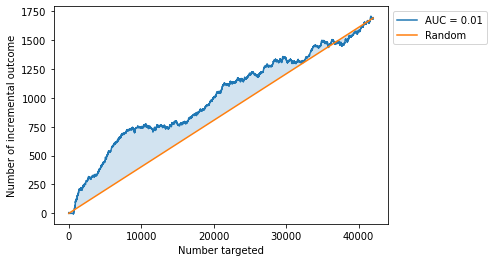

In [42]:
from sklift.viz import plot_uplift_curve

plot_uplift_curve(y_val, sm_trmnt_preds, treat_val, perfect=False);

In [43]:
from sklift.metrics import uplift_auc_score

auuc = uplift_auc_score(y_val, sm_trmnt_preds, treat_val) 
print(f"Uplift auc score on full data: {auuc:.4f}")

Uplift auc score on full data: 0.0136


In [44]:
ct_full = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct_full = ct_full.fit(X_train_full, y_train_full, treat_train_full, estimator_fit_params={'cat_features': cat_features})

X_test.loc[:, 'uplift'] = ct_full.predict(X_test.values)

# sub = X_test[['uplift']].to_csv('sub1.csv')

# !head -n 5 sub1.csv

In [45]:
X_test = X_test.reset_index()
X_test = X_test.drop(labels=['client_id.1', 'age', 'gender', 'first_issue_time', 'first_redeem_time', 'issue_redeem_delay'], axis=1)
new_columns = ['client_id', 'predict']

X_test = X_test.rename(columns = {'index':'client_id', 'uplift' : 'predict'})

In [46]:
sub = X_test.to_csv('submission.csv', index= False)


!head -n 5 submission.csv

client_id,predict
5162b0a530,0.02843409069611791
bb9dd33b1d,0.0490597632323303
896e966e74,0.03325443082972668
44f56cf615,0.07209618154385738
